# 190071B

## Question 1

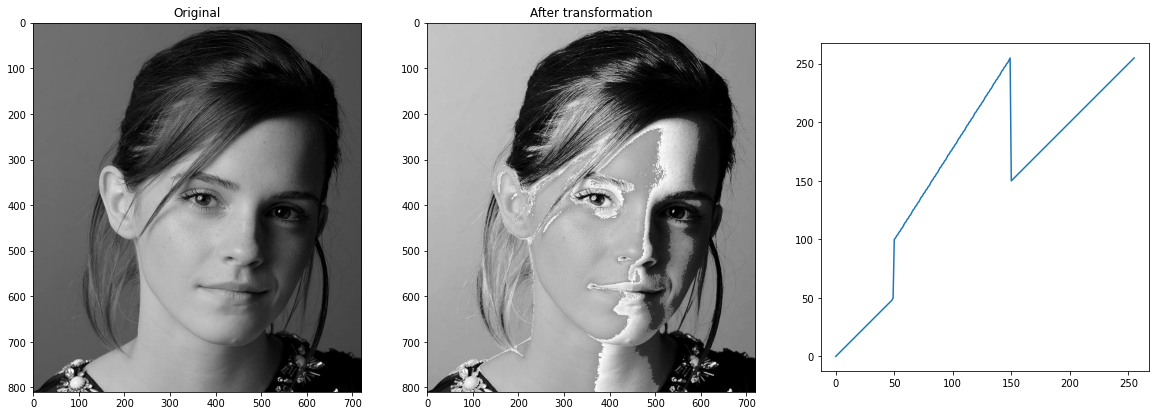

In [22]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

transform1 = np.linspace(0,50,50)
#transform2 = np.linspace(50,100,1)
transform3 = np.linspace(100,255,100)
#transform4 = np.linspace(255,150,1)
transform5 = np.linspace(150,255,106)
transform = np.concatenate((transform1,transform3,transform5), axis = 0).astype(np.uint8)

transformedImg = cv.LUT(img,transform)
# transformedImg = transform[img]#both are same this is the numpy way of doing that


assert len(transform)==256
im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(im)
ax[1].imshow(im2)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
ax[2].plot(transform)
ax[2].set_aspect('equal')
plt.show()


## Question 2

### White Matters

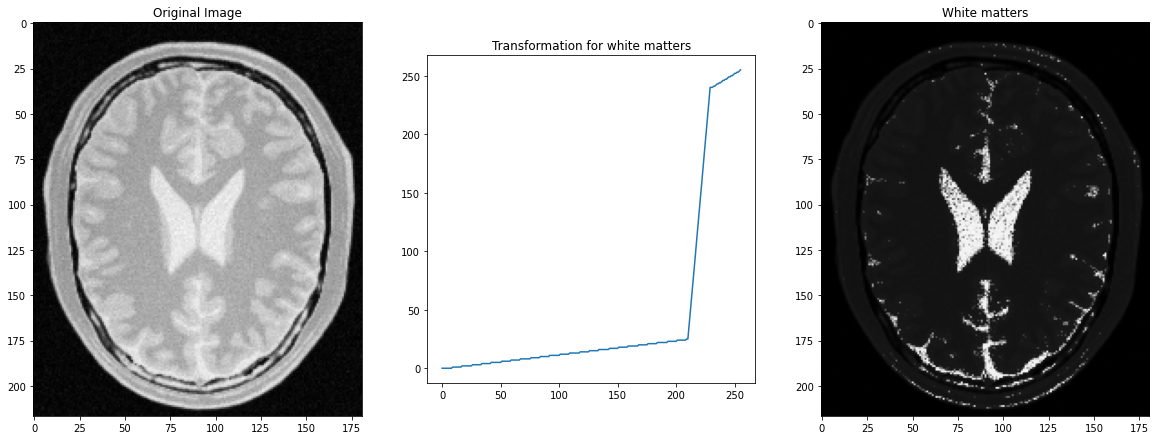

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(imgConverted)


#white matter transformation
transform1 = np.linspace(0,25,210)
#transform2 = np.linspace(50,100,1)
transform3 = np.linspace(25,240,20)
#transform4 = np.linspace(255,150,1)
transform5 = np.linspace(240,255,26)
transform = np.concatenate((transform1,transform3,transform5), axis = 0).astype(np.uint8)
transformedImg = cv.LUT(img,transform)
imgConvertedTransformed = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
ax[2].imshow(imgConvertedTransformed)
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[0].set_title('Original Image')
ax[2].set_title('White matters')
ax[1].set_title('Transformation for white matters')
plt.show()


## Gray Matters

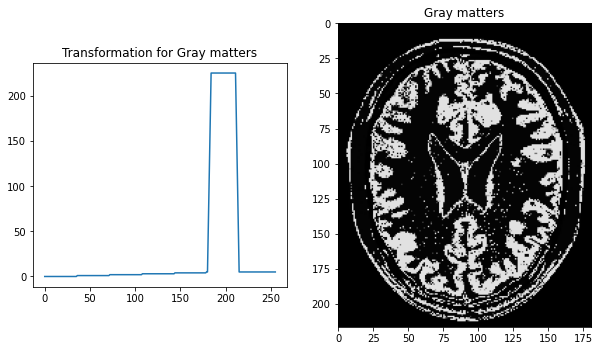

In [24]:
#gray matter transformation
transform1 = np.linspace(0,5,180)
transform2 = np.linspace(5,225,5)
transform3 = np.linspace(225,225,26)
transform4 = np.linspace(225,5,5)
transform5 = np.linspace(5,5,40)


fig, ax = plt.subplots(1,2, figsize = (10,10))

transform = np.concatenate((transform1,transform2,transform3,transform4,transform5), axis = 0).astype(np.uint8)
transformedImg = cv.LUT(img,transform)
imgConvertedTransformed = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[1].imshow(imgConvertedTransformed)
ax[1].set_title('Gray matters')
ax[0].set_title('Transformation for Gray matters')
plt.show()

## Question 3

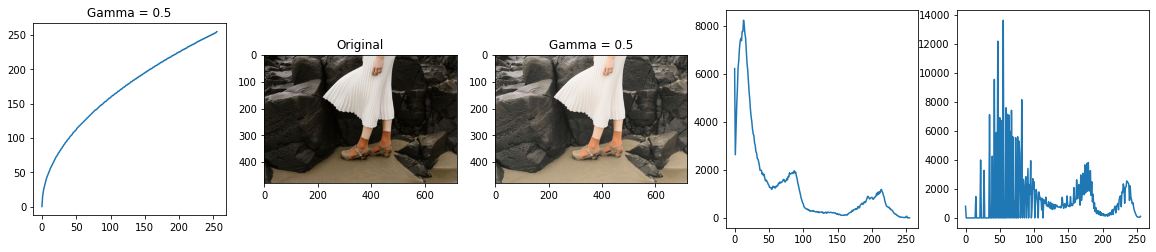

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
imgHab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
gamma = [0.5]
for k in gamma:
    transform = np.array([(p/255)**k*255 for p in range(0,256)]).astype(np.uint8)#
    imgHab[:,:,0]  = cv.LUT(imgHab[:,:,0],transform)
    convertedImg1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    convertedImg2 = cv.cvtColor(imgHab, cv.COLOR_LAB2RGB)
    fig, ax = plt.subplots(1,5, figsize = (20,4))
    ax[0].plot(transform)
    ax[0].set_title('Gamma = %s'%k)
    ax[0].set_aspect('equal')
    ax[1].imshow(convertedImg1)
    ax[2].imshow(convertedImg2)
    ax[1].set_title('Original')
    ax[2].set_title('Gamma = %s'%k)
    hist_img1 = cv.calcHist([img],[0],None,[256],[0,256])
    hist_img2 = cv.calcHist([imgHab],[0],None,[256],[0,256])
    ax[3].plot(hist_img1)
    ax[4].plot(hist_img2)

plt.show()

## Question 4

(500, 500)


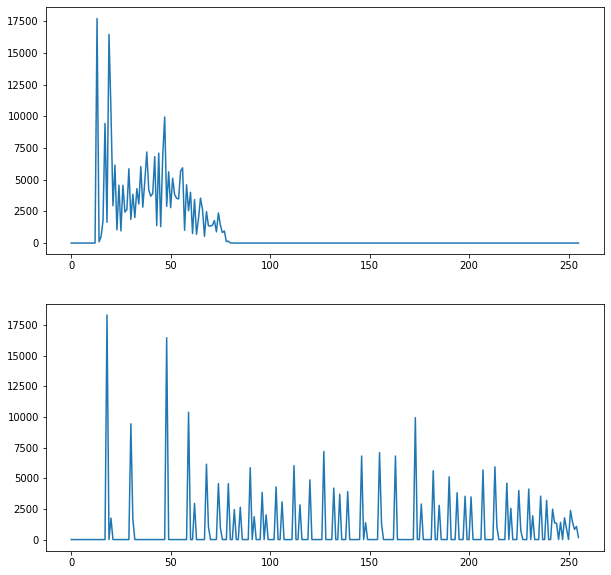

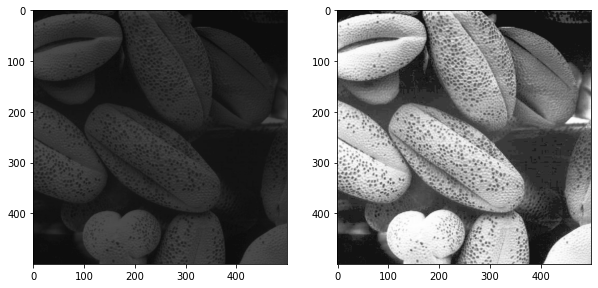

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('shells.png', cv.IMREAD_GRAYSCALE)
print(img.shape)
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(2,1, figsize = (10,10))
hist , bins = np.histogram(img.ravel() , 256 , [0,256])
ax[0].plot(hist)
EqualizeMap = []
sum1 = 0
for i in range(len(bins)-1):
    sum1 += hist[i]
    a = int(round(sum1*255/(img.shape[0]*img.shape[1]),1))
    EqualizeMap.append(a)
    
EqualizedImage = cv.LUT(img,np.array(EqualizeMap).astype(np.uint8))
imgConverted2 = cv.cvtColor(EqualizedImage, cv.COLOR_BGR2RGB)
hist_equalized , bins_equalized = np.histogram(EqualizedImage.ravel() , 256 , [0,256])
ax[1].plot(hist_equalized)
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(imgConverted)
ax[1].imshow(imgConverted2)

Intensity of the image has increased after histogram equalization

## Question 5

[331.2 396.8 179.2]
[363.2   8.  145.6]


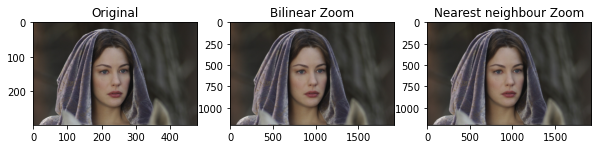

In [63]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def zoom(img,factor):
    zoomimg = np.zeros((int(img.shape[0]*factor),int(img.shape[1]*factor),3),dtype = img.dtype)
    for i in range(zoomimg.shape[0]):
        for j in range(zoomimg.shape[1]):
            x = int(round(i/factor,0))
            y = int(round(j/factor,0))
            if x >= img.shape[0]:
                x = img.shape[0]-1
            if y >= img.shape[1]:
                y = img.shape[1]-1
            zoomimg[i,j] = img[x,y]
    return zoomimg

def zoomBilinear(img,factor):
    zoomimg = np.zeros((int(img.shape[0]*factor),int(img.shape[1]*factor),3),dtype = img.dtype)
    for i in range(zoomimg.shape[0]):
        for j in range(zoomimg.shape[1]):
            x = i / factor
            y = j / factor
            x_1 = int(x)
            y_1 = int(y)
            x_2 = int(x) + 1
            y_2 = int(y) + 1
            if x_1 >= img.shape[0]:
                x_1 = img.shape[0]-1
            if x_2 >= img.shape[0]:
                x_2 = img.shape[0]-1
            if y_1 >= img.shape[1]:
                y_1 = img.shape[1]-1
            if y_2 >= img.shape[1]:
                y_2 = img.shape[1]-1
            value_1 = img[x_1,y_1]*abs(y-y_2) + img[x_1,y_2] * abs(y-y_1)
            value_2 = img[x_2,y_1]*abs(y-y_2) + img[x_2,y_2] * abs(y-y_1)
            value_3 = value_1*abs(x-x_2) + value_2*abs(x-x_1)
            for k in range(3):
                value_3[k] = int(round(value_3[k],0))
            zoomimg[i,j] = value_3
    return zoomimg


img = cv.imread('a1q5images\im02small.png')
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3, figsize = (10,10))
ax[0].imshow(imgConverted)
ax[0].set_title('Original')
zoomImgbilinear = zoomBilinear(img, 4)
zoomImgNearestNeighbour = zoom(img, 4)
        
imgConverted2 = cv.cvtColor(zoomImgbilinear, cv.COLOR_BGR2RGB)
ax[1].imshow(imgConverted2)
ax[1].set_title('Bilinear Zoom')
cv.imwrite("zoomedBiliniear.jpg",zoomImgbilinear)

imgConverted3 = cv.cvtColor(zoomImgNearestNeighbour, cv.COLOR_BGR2RGB)
ax[2].imshow(imgConverted2)
ax[2].set_title('Nearest neighbour Zoom')
cv.imwrite("zoomed.jpg",zoomImgNearestNeighbour)

img1 = cv.imread('a1q5images\im02.png')
print(sum(sum((img1 - zoomImgNearestNeighbour)**2))/img1.shape[0]*img1.shape[1])
print(sum(sum((img1 - zoomImgbilinear)**2))/img1.shape[0]*img1.shape[1])

The zoomed image using bilinear interpolation has good quality more then zoomed using nearest neighbourhood method.

## Question 6

Text(0.5, 1.0, 'sobel filter using Multiplication property')

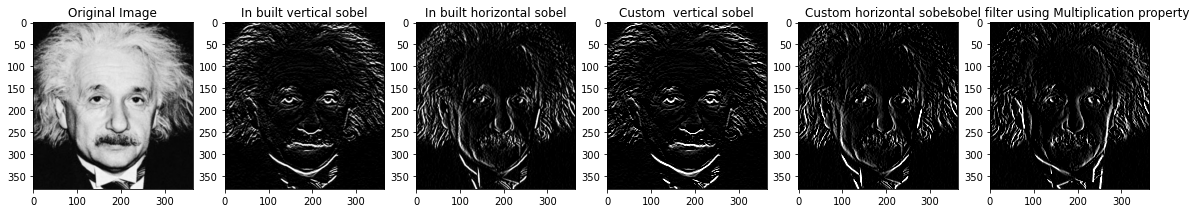

In [76]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def sobel(img, kernal):
    kernal_w = kernal.shape[0]
    kernal_h = kernal.shape[1]
    padsize1 = kernal_w//2
    padsize2 = kernal_h//2

    centerPointx = kernal_w//2 + 1
    centerPointy = kernal_h//2 + 1

    filteredImg = np.zeros((img.shape[0],img.shape[1]), dtype = np.float32)
    for i in range(padsize1,img.shape[0]-padsize1):
        for j in range(padsize2, img.shape[1]-padsize2):
            mat1 = img[i-kernal_w//2:i + kernal_w//2+1, j-kernal_h//2:j + kernal_h//2+1]
            value = sum(sum(mat1 * kernal))
            filteredImg[i,j] = value
    return filteredImg


img = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,6, figsize = (20,20))
ax[0].imshow(imgConverted)
ax[0].set_title('Original Image')

Sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
Sobel_H = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)
imgWithSobelV = cv.filter2D(img,-1,Sobel_V)
imgWithSobelH = cv.filter2D(img,-1,Sobel_H)
imgCustomSobelV = sobel(img, Sobel_V)
imgCustomSobelH = sobel(img, Sobel_H)
ax[1].imshow(imgWithSobelV, cmap = 'gray',vmin = 0,vmax = 255)
ax[1].set_title('In built vertical sobel')
ax[2].imshow(imgWithSobelH, cmap = 'gray',vmin = 0,vmax = 255)
ax[2].set_title('In built horizontal sobel')
ax[3].imshow(imgCustomSobelV, cmap = 'gray',vmin = 0,vmax = 255)
ax[3].set_title('Custom  vertical sobel')
ax[4].imshow(imgCustomSobelH, cmap = 'gray',vmin = 0,vmax = 255)
ax[4].set_title('Custom horizontal sobel')
sobel_1 = np.array([[1],[2],[1]],dtype = np.float32)
sobel_2 = np.array([[1, 0, -1]],dtype = np.float32)
img_1 = sobel(img, sobel_1)
img_2 = sobel(img_1, sobel_2)
ax[5].imshow(img_2, cmap = 'gray',vmin = 0,vmax = 255)
ax[5].set_title('Sobel filter using Multiplication property')

## Question 7

Text(0.5, 1.0, 'Enhanced Image')

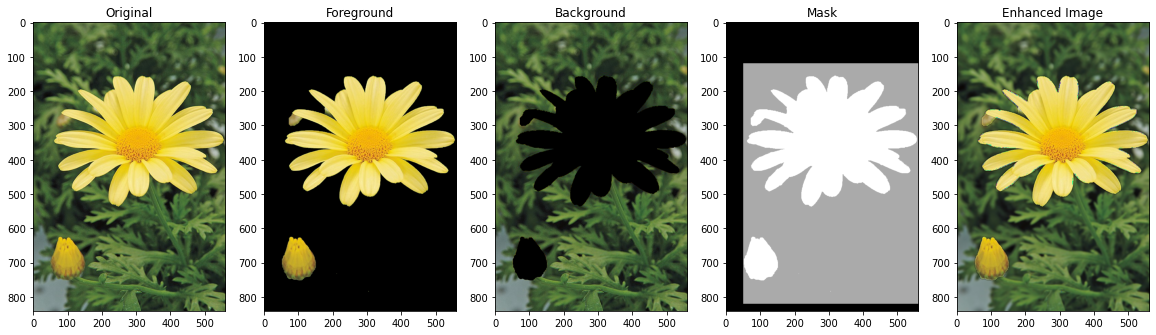

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('daisy.jpg')
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,5, figsize = (20,20))
ax[0].imshow(imgConverted)
ax[0].set_title('Original')
mask = np.zeros(img.shape[:2],np.uint8)
background = np.zeros((1,65),np.float64)
foreground = np.zeros((1,65),np.float64)
rect = (50,120,520,700)
cv.grabCut(img,mask,rect,background,foreground,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_1 = img*mask2[:,:,np.newaxis]
imgConverted2 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
ax[1].imshow(imgConverted2)
ax[1].set_title('Foreground')
img_2 = img - img_1
imgConverted3 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
ax[2].imshow(imgConverted3)
ax[2].set_title('Background')
imgConverted4 = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
ax[3].imshow(mask, cmap = 'gray')
ax[3].set_title('Mask')
img_3 = cv.GaussianBlur(img_2, (9,9),0)
img_4 = img_1 + img_3
imgConverted5 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
ax[4].imshow(imgConverted5)
ax[4].set_title('Enhanced Image')

Background of just beyond the edge of the flower quite dark becuase running kernal of the gaussian blur function for the background spreads the black color around the dark edges of the background image.